# `ACEpotentials.jl` Tutorial
GAP/ACE/MACE workshop (Sept 2023)

## Introduction

The `ACEpotentials.jl` documentation contains a number of short, focused tutorials on key topics. This tutorial is longer and has a single narrative. While it is not specifically intended as a `Julia`-language primer, many `Julia` commands are introduced by example.

### Installing ACEpotentials

`ACEpotentials` normally requires Julia 1.9. For detailed installation instructions, see: https://acesuit.github.io/ACEpotentials.jl/dev/gettingstarted/installation/.

However, for interactive use on the CSC machine, we will instead use modified versions compatible with Julia 1.8. They can be installed as follows. This is not the normal approach and is not recommended in general.

Warning: You may need to run the following command two or three times before it succeeds fully.

In [1]:
# add and load general packages used in this notebook.
using Pkg
Pkg.activate(".")
Pkg.add("LaTeXStrings")
Pkg.add("MultivariateStats")
Pkg.add("Plots")
Pkg.add("Suppressor")
using LaTeXStrings, MultivariateStats, Plots, Printf, Statistics, Suppressor

### normal ACEpotentials installation (requires Julia 1.9)
# using Pkg
# Pkg.activate(".")
# Pkg.Registry.add("General")  # only needed when installing Julia for the first time
# Pkg.Registry.add(RegistrySpec(url="https://github.com/ACEsuit/ACEregistry"))
# Pkg.add("ACEpotentials")
# using ACEpotentials

### ACEpotentials installation for CSC machine (workaround for Julia 1.8)
using Pkg
Pkg.activate(".")
Pkg.Registry.add(RegistrySpec(url="https://github.com/ACEsuit/ACEregistry"))
Pkg.add(url="https://github.com/wcwitt/ACE1x.jl")
Pkg.add(url="https://github.com/wcwitt/ACEfit.jl")
Pkg.add(url="https://github.com/wcwitt/ACEpotentials.jl")
using ACEpotentials

  Activating project at `~`
    Updating registry at `~/.julia/registries/ACE`
    Updating git-repo `https://github.com/ACEsuit/ACEregistry`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
  Activating project at `~`
     Cloning registry from "https://github.com/ACEsuit/ACEregistry"
Registry `ACE` already exists in `~/.julia/registries/ACE`.
    Updating git-repo `https://github.com/wcwitt/ACE1x.jl`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `~/Manifest.toml`
    Updating git-repo `https://github.com/wcwitt/ACEfit.jl`
   Resolving package versions...
  No Changes to `~/Project.toml`
  No Changes to `

Now, let's check the status of the installed projects.

In [2]:
using Pkg
Pkg.status()

Status `~/Project.toml`
  [5cc4c08c] ACE1x v0.1.8 `https://github.com/wcwitt/ACE1x.jl#main`
  [ad31a8ef] ACEfit v0.1.4 `https://github.com/wcwitt/ACEfit.jl#main`
  [3b96b61c] ACEpotentials v0.6.2 `https://github.com/wcwitt/ACEpotentials.jl#main`
  [b964fa9f] LaTeXStrings v1.3.0
  [6f286f6a] MultivariateStats v0.10.2
  [91a5bcdd] Plots v1.38.16
  [fd094767] Suppressor v0.2.3


## Part 1: Basic dataset analysis

`ACEpotentials` provides quick access to several example datasets, which can be useful for testing. The following command lists these datasets. (We expect to expand this list signifcantly; please feel free to suggest additions.)

In [3]:
ACEpotentials.list_example_datasets()

9-element Vector{String}:
 "Si_tiny"
 "TiAl_tiny"
 "TiAl_tutorial"
 "Zuo20_Cu"
 "Zuo20_Ge"
 "Zuo20_Li"
 "Zuo20_Mo"
 "Zuo20_Ni"
 "Zuo20_Si"

We begin by loading the tiny silicon dataset.

In [4]:
Si_tiny_dataset, _, _ = ACEpotentials.example_dataset("Si_tiny");

These data were taken from a larger set published with:

> A. P. Bartók, J. Kermode, N. Bernstein, and G. Csányi, **Machine Learning a General-Purpose Interatomic Potential for Silicon**, Phys. Rev. X 8, 041048 (2018)

To illustrate the procedure for loading extended `xyz` data from a file, we download the larger dataset and load it.

In [5]:
download("https://www.dropbox.com/scl/fi/mzd7zcb1x1l4rw5eswxcd/gp_iter6_sparse9k.xml.xyz?rlkey=o4avtpkka6jnqn7qg375vg7z0&dl=0",
         "Si_dataset.xyz");

Si_dataset = read_extxyz("Si_dataset.xyz");

Next, we assess the dataset sizes.

In [6]:
println("The tiny dataset has ", length(Si_tiny_dataset), " structures.")
println("The large dataset has ", length(Si_dataset), " structures.")

The tiny dataset has 53 structures.
The large dataset has 2475 structures.


Next, we create arrays containing the `config_type` for each structure in the datasets. Afterwards, we count the configurations of each type.

In [7]:
config_types_tiny = [at.data["config_type"].data for at in Si_tiny_dataset]
config_types = [at.data["config_type"].data for at in Si_dataset]

function count_configs(config_types)
    config_counts = [sum(config_types.==ct) for ct in unique(config_types)]
    config_dict = Dict([ct=>cc for (ct,cc) in zip(unique(config_types), config_counts)])
end;

In [8]:
println("There are ", length(unique(config_types_tiny)), " unique config_types "*
        "in the tiny dataset:")
display(count_configs(config_types_tiny))

There are 4 unique config_types in the tiny dataset:


Dict{String, Int64} with 4 entries:
  "isolated_atom" => 1
  "dia"           => 25
  "liq"           => 2
  "bt"            => 25

In [9]:
println("There are ", length(unique(config_types)), " unique config_types "*
        "in the full dataset:")
display(count_configs(config_types))

There are 27 unique config_types in the full dataset:


Dict{String, Int64} with 27 entries:
  "sh"                  => 223
  "vacancy"             => 211
  "surface_110"         => 26
  "sp2"                 => 51
  "fcc"                 => 49
  "bt"                  => 445
  "crack_110_1-10"      => 7
  "isolated_atom"       => 1
  "dia"                 => 489
  "divacancy"           => 78
  "interstitial"        => 115
  "hcp"                 => 49
  "surface_111_3x3_das" => 1
  "amorph"              => 159
  "decohesion"          => 33
  "111adatom"           => 11
  "sp"                  => 100
  "liq"                 => 76
  "surface_001"         => 29
  "bc8"                 => 49
  "st12"                => 49
  "surface_111"         => 47
  "screw_disloc"        => 19
  "crack_111_1-10"      => 10
  "hex_diamond"         => 49
  ⋮                     => ⋮

Two basic distributions which indicate how well the data fills space are the radial and angular distribution functions. We begin with the radial distribution function, plotting using the `histogram` function in `Plots.jl`. For the RDF we add some vertical lines to indicate the distances and first, second neighbours and so forth to confirm that the peaks are in the right place.

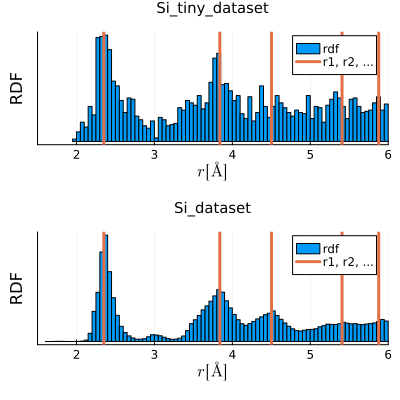

In [10]:
r_cut = 6.0

rdf_tiny = ACEpotentials.get_rdf(Si_tiny_dataset, r_cut; rescale = true)
plt_rdf_1 = histogram(rdf_tiny[(:Si, :Si)], bins=150, label = "rdf",
                      title="Si_tiny_dataset", titlefontsize=10,
                      xlabel = L"r[\AA]", ylabel = "RDF", yticks = [],
                      xlims=(1.5,6), size=(400,200), left_margin = 2Plots.mm)
vline!(rnn(:Si)*[1.0, 1.633, 1.915, 2.3, 2.5], label = "r1, r2, ...", lw=3)

rdf = ACEpotentials.get_rdf(Si_dataset, r_cut; rescale = true);
plt_rdf_2 = histogram(rdf[(:Si, :Si)], bins=150, label = "rdf",
                      title="Si_dataset", titlefontsize=10,
                      xlabel = L"r[\AA]", ylabel = "RDF", yticks = [],
                      xlims=(1.5,6), size=(400,200), left_margin = 2Plots.mm)
vline!(rnn(:Si)*[1.0, 1.633, 1.915, 2.3, 2.5], label = "r1, r2, ...", lw=3)

plot(plt_rdf_1, plt_rdf_2, layout=(2,1), size=(400,400))

The larger dataset clearly has a better-converged radial distribution function.

For the angular distribution function, we use a cutoff just above the nearest-neighbour distance so we can clearly see the equilibrium bond-angles. In this case, the vertical line indicates the equilibrium bond angle.

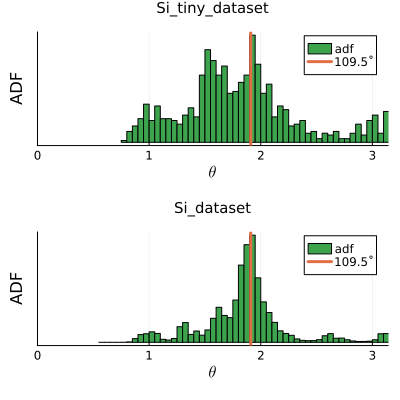

In [11]:
r_cut_adf = 1.25 * rnn(:Si)
eq_angle = 1.91 # radians
adf_tiny = ACEpotentials.get_adf(Si_tiny_dataset, r_cut_adf);
plt_adf_1 = histogram(adf_tiny, bins=50, label = "adf", yticks = [], c = 3, 
                    title = "Si_tiny_dataset", titlefontsize = 10,
                    xlabel = L"\theta", ylabel = "ADF",
                    xlims = (0, π), size=(400,200), left_margin = 2Plots.mm)
vline!([ eq_angle,], label = "109.5˚", lw=3)

adf = ACEpotentials.get_adf(Si_dataset, r_cut_adf);
plt_adf_2 = histogram(adf, bins=50, label = "adf", yticks = [], c = 3, 
                    title = "Si_dataset", titlefontsize = 10,
                    xlabel = L"\theta", ylabel = "ADF",
                    xlims = (0, π), size=(400,200), left_margin = 2Plots.mm)
vline!([ eq_angle,], label = "109.5˚", lw=3)

plot(plt_adf_1, plt_adf_2, layout=(2,1), size=(400,400))

For later use, we define a function that extracts the energies stored in the silicon datasets.

In [12]:
function extract_energies(dataset)
    energies = []
    for atoms in dataset
        for key in keys(atoms.data)
            if lowercase(key) == "dft_energy"
                push!(energies, atoms.data[key].data/length(atoms))
            end
        end
    end
    return energies
end;
    
Si_dataset_energies = extract_energies(Si_dataset)
    
GC.gc()

## Part 2: ACE descriptors

An ACE basis specifies a vector of invariant features of atomic environments and can therefore be used as a general descriptor.

Some important parameters include:
* `elements`: list of chemical species, as symbols;
* `order`: correlation/interaction order (body order - 1);
* `totaldegree`: maximum total polynomial degree used for the basis;
* `rcut` : cutoff radius (optional, defaults are provided).

In [13]:
basis = ACE1x.ace_basis(elements = [:Si],
                        rcut = 5.5,
                        order = 3,        # body-order - 1
                        totaldegree = 8);

As an example, we compute an averaged structural descriptor for each configuration in the tiny dataset.

In [14]:
descriptors = []
for atoms in Si_tiny_dataset
    struct_descriptor = sum(site_descriptors(basis, atoms)) / length(atoms)
    push!(descriptors, struct_descriptor)
end

Next, we extract and plot the principal components of the structural descriptors. Note the segregation by configuration type.

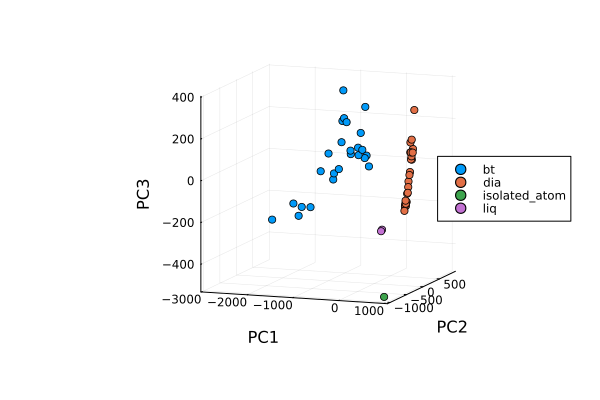

In [15]:
descriptors = hcat(descriptors...)  # convert to matrix
M = fit(PCA, descriptors; maxoutdim=3, pratio=1)
descriptors_trans = transform(M, descriptors)
p = scatter(
     descriptors_trans[1,:], descriptors_trans[2,:], descriptors_trans[3,:],
     marker=:circle, linewidth=0, group=config_types_tiny, legend=:right)
plot!(p, xlabel="PC1", ylabel="PC2", zlabel="PC3", camera=(20,10))

Finally, we repeat the procedure for the full dataset. Some clustering is apparent, although the results are a bit harder to interpret.

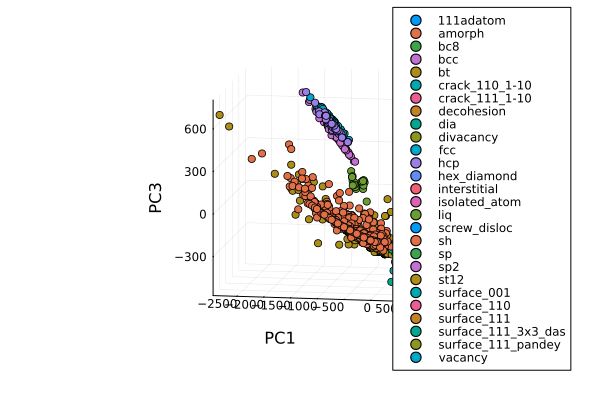

In [16]:
descriptors = []
for atoms in Si_dataset
    struct_descriptor = sum(site_descriptors(basis, atoms)) / length(atoms)
    push!(descriptors, struct_descriptor)
end

descriptors = hcat(descriptors...)  # convert to matrix
M = fit(PCA, descriptors; maxoutdim=3, pratio=1)
descriptors_trans = transform(M, descriptors)
p = scatter(
     descriptors_trans[1,:], descriptors_trans[2,:], descriptors_trans[3,:],
     marker=:circle, linewidth=0, group=config_types, legend=:right)
plot!(p, xlabel="PC1", ylabel="PC2", zlabel="PC3", camera=(10,10))

In [17]:
GC.gc()

## Part 3: Basic model fitting

We begin by defining an (extremely simple) `acemodel`. The parameters have the same meaning as for `ace_basis` above, with an additional `Eref` providing a reference energy.

In [18]:
model = acemodel(elements = [:Si,],
                 order = 3,
                 totaldegree = 8,
                 rcut = 5.0,
                 Eref = [:Si => -158.54496821])
@show length(model.basis);

length(model.basis) = 54


Next, we fit determine the model parameters using the tiny dataset and ridge regression via the `QR` solver.

In [19]:
solver = ACEfit.QR(lambda=1e-1)
data_keys = (energy_key = "dft_energy", force_key = "dft_force", virial_key = "dft_virial")
acefit!(model, Si_tiny_dataset;
        solver=solver, data_keys...);

┌───────────────┬──────────┬───────┬────┬─────┬─────┐
│          Type │ #Configs │ #Envs │ #E │  #F │  #V │
├───────────────┼──────────┼───────┼────┼─────┼─────┤
│ isolated_atom │        1 │     1 │  1 │   3 │   0 │
│           dia │       25 │    50 │ 25 │ 150 │ 150 │
│            bt │       25 │    50 │ 25 │ 150 │ 150 │
│           liq │        2 │   128 │  2 │ 384 │  12 │
├───────────────┼──────────┼───────┼────┼─────┼─────┤
│         total │       53 │   229 │ 53 │ 687 │ 312 │
│       missing │        0 │     0 │  0 │   0 │   6 │
└───────────────┴──────────┴───────┴────┴─────┴─────┘


[ Info: Assembling linear problem.
[ Info:   - Creating feature matrix with size (1052, 54).
[ Info:   - Beginning assembly with processor count:  1.
Progress: 100%|█████████████████████████████████████████| Time: 0:00:22
[ Info:   - Assembly completed.
[ Info: Assembling full weight vector.
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


In [20]:
@info("Training Errors")
ACEpotentials.linear_errors(Si_tiny_dataset, model; data_keys...);

@info("Test Error")
ACEpotentials.linear_errors(Si_dataset, model; data_keys...);

[ Info: Training Errors
[ Info: RMSE Table


┌───────────────┬─────────┬──────────┬─────────┐
│          Type │ E [meV] │ F [eV/A] │ V [meV] │
├───────────────┼─────────┼──────────┼─────────┤
│ isolated_atom │   0.000 │    0.000 │   0.000 │
│           dia │  12.062 │    0.124 │ 178.299 │
│           liq │   0.846 │    0.474 │  88.575 │
│            bt │  21.021 │    0.336 │ 465.305 │
├───────────────┼─────────┼──────────┼─────────┤
│           set │  16.646 │    0.392 │ 345.943 │
└───────────────┴─────────┴──────────┴─────────┘
┌───────────────┬─────────┬──────────┬─────────┐
│          Type │ E [meV] │ F [eV/A] │ V [meV] │
├───────────────┼─────────┼──────────┼─────────┤
│ isolated_atom │   0.000 │    0.000 │   0.000 │
│           dia │   9.128 │    0.091 │ 143.589 │
│           liq │   0.623 │    0.378 │  65.496 │
│            bt │  15.558 │    0.216 │ 323.272 │
├───────────────┼─────────┼──────────┼─────────┤
│           set │  11.668 │    0.278 │ 226.971 │
└───────────────┴─────────┴──────────┴─────────┘


[ Info: MAE Table
[ Info: Test Error


┌─────────────────────┬─────────┬──────────┬──────────┐
│                Type │ E [meV] │ F [eV/A] │  V [meV] │
├─────────────────────┼─────────┼──────────┼──────────┤
│                  sh │  21.778 │    0.205 │  443.193 │
│             vacancy │  15.306 │    0.225 │   88.894 │
│         surface_110 │ 641.229 │    0.755 │    0.000 │
│                 sp2 │ 725.116 │    0.329 │    0.000 │
│                 fcc │ 131.922 │    0.504 │ 1219.270 │
│                  bt │  26.640 │    0.156 │  608.626 │
│      crack_110_1-10 │ 459.389 │    0.619 │  107.697 │
│       isolated_atom │   0.000 │    0.000 │    0.000 │
│                 dia │  20.423 │    0.128 │  192.039 │
│           divacancy │  14.672 │    0.274 │    0.000 │
│        interstitial │  15.162 │    0.253 │   37.296 │
│                 hcp │ 182.607 │    0.284 │ 1041.141 │
│ surface_111_3x3_das │ 707.432 │    0.633 │    0.000 │
│              amorph │ 137.502 │    0.499 │    0.000 │
│          decohesion │ 177.409 │    0.535 │  17

[ Info: RMSE Table
[ Info: MAE Table


A model may be exported to JSON or LAMMPS formats with the following.

In [21]:
export2json("model.json", model)
export2lammps("model.yace", model)

## Part 4: Committee models

`ACEpotentials.jl` can produce committee models using Bayesian linear regression. Such committees provide uncertainty estimates useful for active learning.

Recall our two silicon datasets. We begin by training a (relatively small) model on the tiny version.

Note the use of the `BLR` solver with a nonzero committee size.

In [22]:
model = acemodel(elements = [:Si,],
                 Eref = [:Si => -158.54496821],
                 order = 3,
                 totaldegree = 12);

acefit!(model, Si_tiny_dataset;
        solver = ACEfit.BLR(committee_size=50, factorization=:svd),
        energy_key = "dft_energy", force_key = "dft_force",
        verbose = false);

[ Info: Assembling linear problem.
[ Info:   - Creating feature matrix with size (740, 211).
[ Info:   - Beginning assembly with processor count:  1.
Progress: 100%|█████████████████████████████████████████| Time: 0:00:17
[ Info:   - Assembly completed.
[ Info: Assembling full weight vector.
[ Info: Entering bayesian_linear_regression_svd
┌ Info: Computing SVD of (740, 211) matrix
│   BLAS.get_num_threads() = 8
│   BLAS.get_config() =
│    LinearAlgebra.BLAS.LBTConfig
│    Libraries: 
└    └ [ILP64] libopenblas64_.so
[ Info: SVD completed after 0.0004713770166666667 minutes
[ Info: Beginning to maximize marginal likelihood


Iter     Function value   Gradient norm 
     0     9.354793e+02     4.761390e+02
 * time: 0.016937971115112305
     1     6.368997e+02     5.288542e+02
 * time: 0.9281370639801025
     2     5.678449e+02     4.495297e+02
 * time: 0.9284050464630127
     3     5.321225e+02     3.019035e+02
 * time: 0.9285340309143066
     4     4.919543e+02     3.436624e+02
 * time: 0.9286489486694336
     5     4.439924e+02     5.710702e+02
 * time: 0.9287669658660889
     6     3.553933e+02     1.759217e+03
 * time: 0.9288480281829834
     7     1.739056e+02     1.349809e+03
 * time: 0.9289519786834717
     8     1.141674e+02     1.146245e+03
 * time: 0.9290461540222168
     9     7.288320e+01     3.517221e+02
 * time: 0.9291951656341553
    10     6.766654e+01     1.421523e+02
 * time: 0.9292950630187988
    11     5.372671e+01     8.945942e+02
 * time: 0.9294109344482422
    12     4.229356e+01     4.193503e+02
 * time: 0.9295051097869873
    13     3.929799e+01     2.023800e+01
 * time: 0.92960715

┌ Info: Optimization complete
│   Results =
│     * Status: success
│    
│     * Candidate solution
│        Final objective value:     3.876148e+01
│    
│     * Found with
│        Algorithm:     L-BFGS
│    
│     * Convergence measures
│        |x - x'|               = 1.50e-10 ≤ 1.0e-08
│        |x - x'|/|x'|          = 1.46e-11 ≰ 0.0e+00
│        |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
│        |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
│        |g(x)|                 = 1.52e-12 ≰ 0.0e+00
│    
│     * Work counters
│        Seconds run:   1  (vs limit Inf)
│        Iterations:    19
│        f(x) calls:    82
│        ∇f(x) calls:   82
└    


Next we define a function which assesses model performance on the full silicon dataset.

In [23]:
function assess_model(model, train_dataset)

    plot([-164,-158], [-164,-158]; lc=:black, label="")
    
    model_energies = []
    model_std = []
    for atoms in Si_dataset
        ene, co_ene = ACE1.co_energy(model.potential, atoms)
        push!(model_energies, ene/length(atoms))
        push!(model_std, std(co_ene/length(atoms)))
    end
    rmse = sqrt(sum((model_energies-Si_dataset_energies).^2)/length(Si_dataset))
    mae = sum(abs.(model_energies-Si_dataset_energies))/length(Si_dataset)
    scatter!(Si_dataset_energies, model_energies;
             label="full dataset",
             title = @sprintf("Structures Used In Training:  %i out of %i\n", length(train_dataset), length(Si_dataset)) *
                     @sprintf("RMSE (MAE) For Entire Dataset:  %.0f (%.0f) meV/atom", 1000*rmse, 1000*mae),
             titlefontsize = 8,
             yerror = model_std,
             xlabel="Energy [eV/atom]", xlims=(-164,-158),
             ylabel="Model Energy [eV/atom]", ylims=(-164,-158),
             aspect_ratio = :equal, color=1)

    model_energies = [energy(model.potential,atoms)/length(atoms) for atoms in train_dataset]
    scatter!(extract_energies(train_dataset), model_energies;
             label="training set", color=2)
    
end;

Applying this function to our current model yields

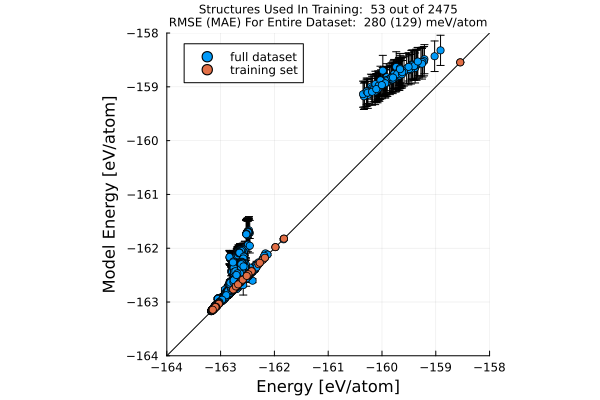

In [24]:
assess_model(model, Si_tiny_dataset)

Clearly there is room to improve: the model-derived RMSE is 280 meV/atom for the full dataset. Moreover, the error bars show the standard deviation of the energies predicted by the commmittee, which are quite high for some data.

Next, we will define a function that augments the tiny dataset by adding structures for which the model is least confident.

In [25]:
function augment(old_dataset, old_model; num=5)

    new_dataset = deepcopy(old_dataset)
    new_model = deepcopy(old_model)
    
    model_std = []
    for atoms in Si_dataset
        ene, co_ene = ACE1.co_energy(new_model.potential, atoms)
        push!(model_std, std(co_ene/length(atoms)))
    end
    for atoms in Si_dataset[sortperm(model_std; rev=true)[1:num]]
        push!(new_dataset, atoms)
    end
    @suppress acefit!(new_model, new_dataset;
            solver = ACEfit.BLR(committee_size=50, factorization=:svd),
            energy_key = "dft_energy", force_key = "dft_force",
            verbose = false);
    
    return new_dataset, new_model
end;

The following applies this strategy, adding the five structures with the highest committee deviation.

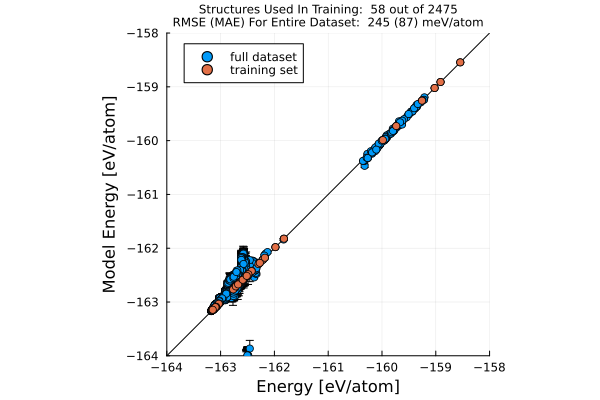

In [26]:
new_dataset, new_model = augment(Si_tiny_dataset, model; num=5);
assess_model(new_model, new_dataset)

Already, there is notable improvement. The overall errors have dropped, and the predictions for the worst-performing structures are much improved.

Next, we perform four additional augmentation steps, adding twenty structures in total.

i = 1
i = 2
i = 3
i = 4


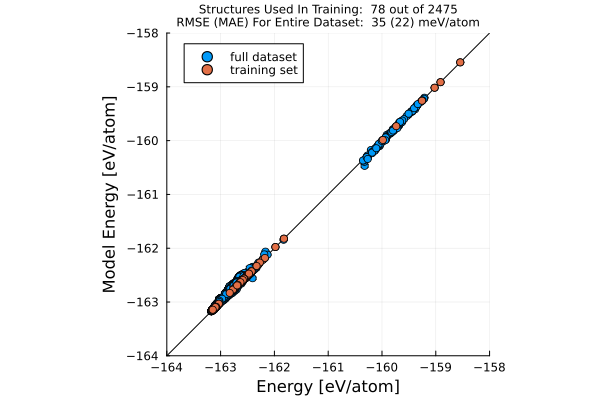

In [27]:
for i in 1:4
    @show i
    new_dataset, new_model = augment(new_dataset, new_model; num=5);
end
assess_model(new_model, new_dataset)

Remarkably, although we are using only a small fraction (~3%) of the full dataset, our model now performs reasonably well.

Further iterations may improve on this result; however, a larger model is necessary to obtain extremely low errors.

**Important:** While this dataset filtering can be useful, the connection with active learning is crucial. Recall that we _did not_ use the reference energies when selecting structures, only the committee deviation.

In [28]:
GC.gc()

## Part 5: Multiple elements

We briefly demonstrate the syntax for multiple elements, using a TiAl dataset.

In [29]:
tial_data, _, _ = ACEpotentials.example_dataset("TiAl_tutorial");

The species-dependent RDFs are obtained as

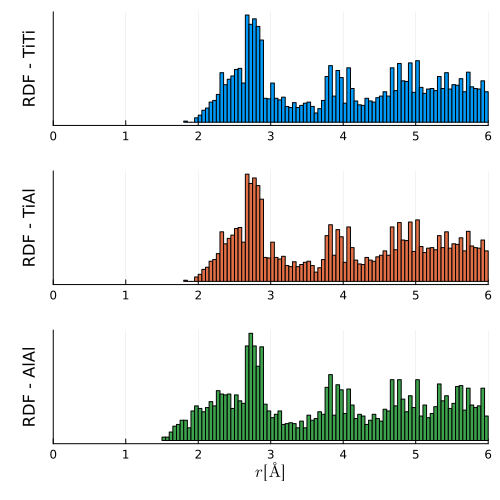

In [30]:
r_cut = 6.0
rdf = ACEpotentials.get_rdf(tial_data, r_cut)
plt_TiTi = histogram(rdf[(:Ti, :Ti)], bins=100, xlabel = "", c = 1,  
         ylabel = "RDF - TiTi", label = "", yticks = [], xlims = (0, r_cut) )
plt_TiAl = histogram(rdf[(:Ti, :Ti)], bins=100, xlabel = "", c = 2, 
         ylabel = "RDF - TiAl", label = "", yticks = [], xlims = (0, r_cut) )
plt_AlAl = histogram(rdf[(:Al, :Al)], bins=100, xlabel = L"r [\AA]", c = 3, 
         ylabel = "RDF - AlAl", label = "", yticks = [], xlims = (0, r_cut), )
plot(plt_TiTi, plt_TiAl, plt_AlAl, layout = (3,1), size = (500, 500), left_margin = 6Plots.mm)

An `acemodel` is defined as

In [31]:
model = acemodel(elements = [:Ti, :Al],
                 order = 3,
                 totaldegree = 6,
                 rcut = 5.5,
                 Eref = [:Ti => -1586.0195, :Al => -105.5954])
@show length(model.basis);

length(model.basis) = 190


and it is fit in the same manner.

In [32]:
acefit!(model, tial_data[1:5:end]);
ACEpotentials.linear_errors(tial_data[1:5:end], model);

┌────────────┬──────────┬───────┬────┬──────┬─────┐
│       Type │ #Configs │ #Envs │ #E │   #F │  #V │
├────────────┼──────────┼───────┼────┼──────┼─────┤
│   FLD_TiAl │       63 │   126 │ 63 │  378 │ 378 │
│ TiAl_T5000 │        3 │   310 │  3 │  930 │  18 │
├────────────┼──────────┼───────┼────┼──────┼─────┤
│      total │       66 │   436 │ 66 │ 1308 │ 396 │
│    missing │        0 │     0 │  0 │    0 │   0 │
└────────────┴──────────┴───────┴────┴──────┴─────┘


[ Info: Assembling linear problem.
[ Info:   - Creating feature matrix with size (1770, 190).
[ Info:   - Beginning assembly with processor count:  1.
Progress: 100%|█████████████████████████████████████████| Time: 0:00:23
[ Info:   - Assembly completed.
[ Info: Assembling full weight vector.


Iter     Function value   Gradient norm 
     0     3.123681e+03     9.102822e+02
 * time: 0.00023603439331054688
     1     1.868056e+03     1.964735e+03
 * time: 0.007830142974853516
     2     1.004533e+03     1.100086e+03
 * time: 0.016579151153564453
     3     9.890646e+02     5.679420e+02
 * time: 0.020148038864135742
     4     9.857921e+02     4.242843e+01
 * time: 0.022012948989868164
     5     9.698997e+02     1.074810e+03
 * time: 0.02635502815246582
     6     9.572345e+02     1.759600e+03
 * time: 0.028872013092041016
     7     9.356418e+02     4.742381e+02
 * time: 0.030714035034179688
     8     9.264694e+02     9.093581e+00
 * time: 0.03330802917480469
     9     9.250427e+02     4.465160e+01
 * time: 0.035125017166137695
    10     9.249931e+02     2.116285e+01
 * time: 0.03673505783081055
    11     9.249874e+02     1.007818e-01
 * time: 0.03920102119445801
    12     9.249874e+02     8.284119e-04
 * time: 0.04089093208312988
    13     9.249874e+02     6.495111e-0

[ Info: RMSE Table
[ Info: MAE Table


## Next steps

* Review tutorials from ACEpotentials documentation: https://acesuit.github.io/ACEpotentials.jl/dev/tutorials/
* Parallel fitting: https://acesuit.github.io/ACEpotentials.jl/dev/gettingstarted/parallel-fitting/
* Install LAMMPS with ACEpotentials patch: https://acesuit.github.io/ACEpotentials.jl/dev/tutorials/lammps/
* Use an `ACEpotentials.jl` potential with ASE: https://acesuit.github.io/ACEpotentials.jl/dev/tutorials/python_ase/
* Recreate a table from the ACEpotentials paper: https://github.com/ACEsuit/ACEworkflows/blob/main/Zuo2020Benchmark/ACEpotentials_paper.jl